In [139]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')

In [140]:
gpu_data = pd.read_csv('gpu.csv', index_col=0);
gpu_data['env']='gpu'

In [141]:
sim_data = pd.read_csv('sim.csv', index_col=0);sim_data

,benchmark,env,inst,numwf,numwg,count,time
0,alu,sim,"v_add_f32 v1, v2, v3",1,1,0,0.000002
1,alu,sim,"v_add_f32 v1, v2, v3",1,2,0,0.000002
2,alu,sim,"v_add_f32 v1, v2, v3",1,3,0,0.000002
3,alu,sim,"v_add_f32 v1, v2, v3",1,4,0,0.000002
4,alu,sim,"v_add_f32 v1, v2, v3",1,5,0,0.000002
5,alu,sim,"v_add_f32 v1, v2, v3",1,6,0,0.000002
6,alu,sim,"v_add_f32 v1, v2, v3",1,7,0,0.000002
7,alu,sim,"v_add_f32 v1, v2, v3",1,8,0,0.000002
8,alu,sim,"v_add_f32 v1, v2, v3",2,1,0,0.000002
9,alu,sim,"v_add_f32 v1, v2, v3",2,2,0,0.000002


In [142]:
data = gpu_data.groupby(['benchmark', 'inst', 'numwf', 'numwg', 'count', 'env']).agg(np.mean).reset_index();
data

,benchmark,inst,numwf,numwg,count,env,time
0,alu,"v_add_f32 v1, v2, v3",1,1,0,gpu,0.000003
1,alu,"v_add_f32 v1, v2, v3",1,1,4,gpu,0.000003
2,alu,"v_add_f32 v1, v2, v3",1,1,8,gpu,0.000003
3,alu,"v_add_f32 v1, v2, v3",1,1,12,gpu,0.000003
4,alu,"v_add_f32 v1, v2, v3",1,1,16,gpu,0.000003
5,alu,"v_add_f32 v1, v2, v3",1,1,20,gpu,0.000003
6,alu,"v_add_f32 v1, v2, v3",1,1,24,gpu,0.000003
7,alu,"v_add_f32 v1, v2, v3",1,1,28,gpu,0.000003
8,alu,"v_add_f32 v1, v2, v3",1,1,32,gpu,0.000003
9,alu,"v_add_f32 v1, v2, v3",1,1,36,gpu,0.000003


In [143]:
full_data = data.append(sim_data);full_data

,benchmark,count,env,inst,numwf,numwg,time
0,alu,0,gpu,"v_add_f32 v1, v2, v3",1,1,0.000003
1,alu,4,gpu,"v_add_f32 v1, v2, v3",1,1,0.000003
2,alu,8,gpu,"v_add_f32 v1, v2, v3",1,1,0.000003
3,alu,12,gpu,"v_add_f32 v1, v2, v3",1,1,0.000003
4,alu,16,gpu,"v_add_f32 v1, v2, v3",1,1,0.000003
5,alu,20,gpu,"v_add_f32 v1, v2, v3",1,1,0.000003
6,alu,24,gpu,"v_add_f32 v1, v2, v3",1,1,0.000003
7,alu,28,gpu,"v_add_f32 v1, v2, v3",1,1,0.000003
8,alu,32,gpu,"v_add_f32 v1, v2, v3",1,1,0.000003
9,alu,36,gpu,"v_add_f32 v1, v2, v3",1,1,0.000003


(2e-06, 5e-06)

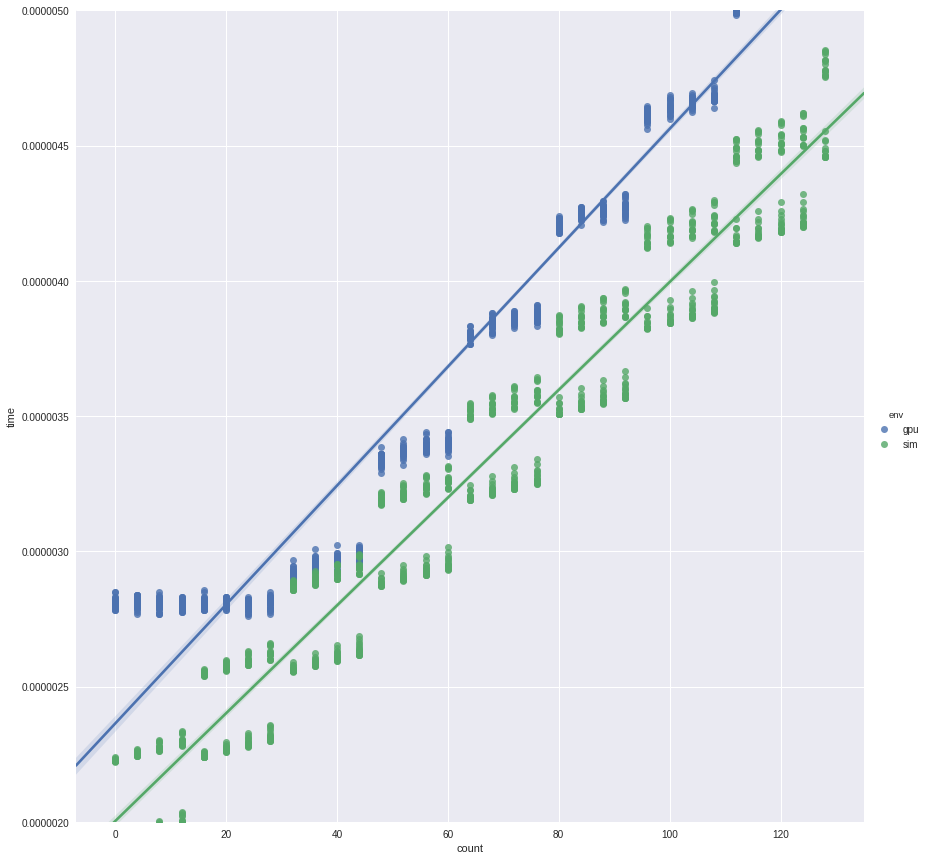

In [144]:
plt.figure(figsize=(15,8))
lm = sns.lmplot('count', 'time', full_data, hue='env', size=12)
lm.axes[0, 0].set_ylim(2e-6, 5e-6)

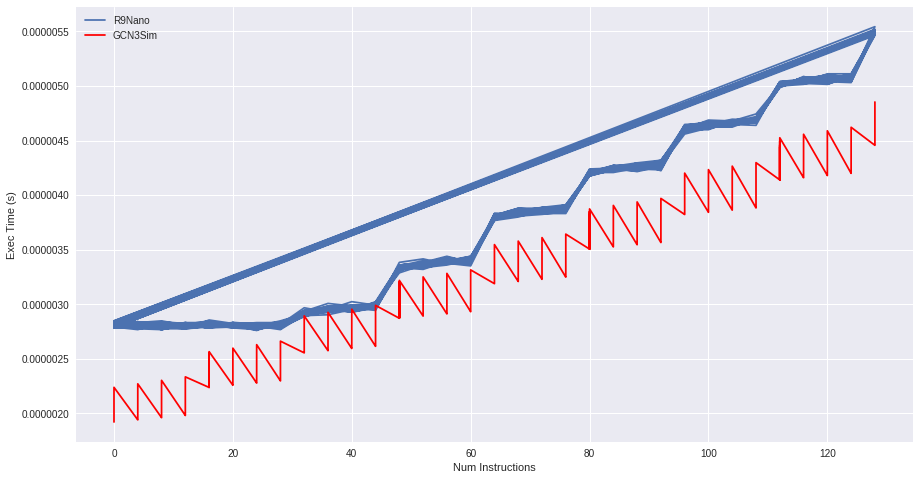

In [145]:
plt.figure(figsize=(15, 8))
plt.plot(data['count'], data['time'], label='R9Nano')
plt.plot(sim_data['count'], sim_data['time'], c='r', label='GCN3Sim')
plt.xlabel('Num Instructions')
plt.ylabel('Exec Time (s)')
plt.legend()
plt.savefig('alu1.pdf')

In [146]:
data_wf = full_data[(full_data['inst']=='v_add_f32 v1, v2, v3') & (full_data['env']=='gpu')];data_wf
result = sm.ols(formula="time ~ count", data=data_wf).fit()
result.params

Intercept    2.363197e-06
count        2.198767e-08
dtype: float64

In [147]:
data_wf = full_data[(full_data['inst']=='v_add_f32 v1, v2, v3') & (full_data['env']=='gpu') & (full_data['count']>=96) & (full_data['count']<112) ];data_wf
result = sm.ols(formula="time ~ count", data=data_wf).fit()
result.params

Intercept    4.046710e-06
count        5.913320e-09
dtype: float64

In [148]:
data_wf = full_data[(full_data['inst']=='v_add_f32 v1, v2, v3') & (full_data['env']=='sim')];data_wf
result = sm.ols(formula="time ~ count", data=data_wf).fit()
result.params

Intercept    2.002443e-06
count        1.993057e-08
dtype: float64

In [149]:
data_wf = full_data[(full_data['inst']=='v_add_f32 v1, v2, v3') & (full_data['env']=='gpu') & (full_data['count']>=32) & (full_data['count']%16==0) ];data_wf
result = sm.ols(formula="time ~ count", data=data_wf).fit()
result.params

Intercept    2.069080e-06
count        2.659085e-08
dtype: float64

## Conclusion
We observe the steping behavior, which is caused by instruction cache miss. If there is no cache miss, `v_add_f32` takes exactly 5 cycles. Assuming the v_add_f32 takes 4 cycles in pipeline, then a cache miss takes about 400 cycles.

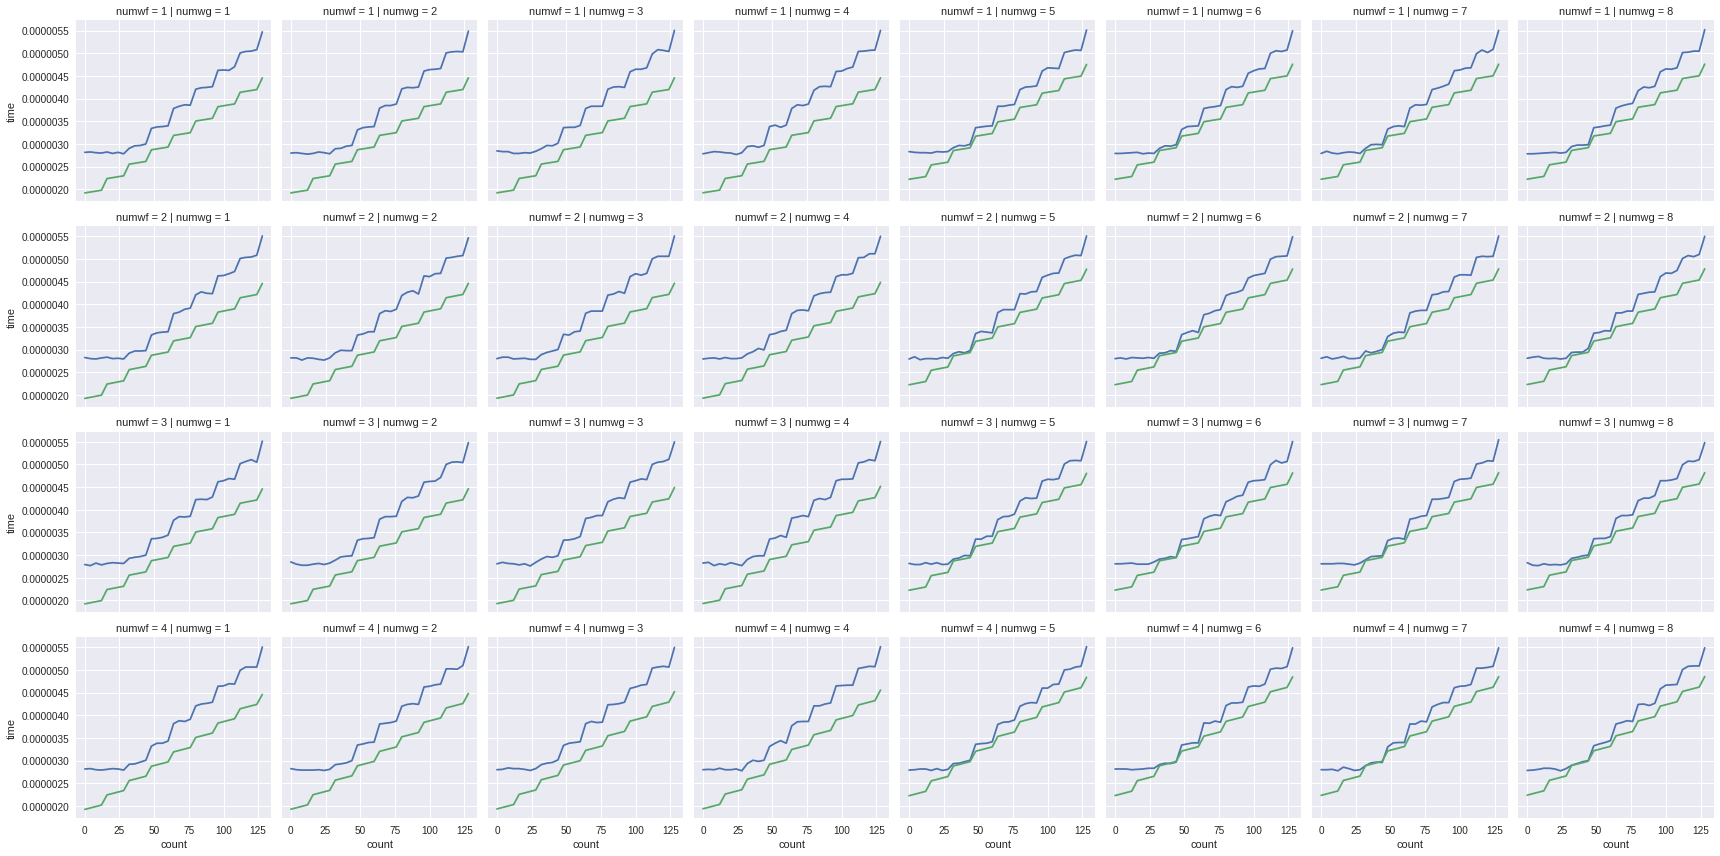

In [155]:
g = sns.FacetGrid(full_data, row='numwf', col='numwg', hue='env', legend_out=True)
g.map(plt.plot, 'count', 'time')
plt.savefig('vector_sp_alu.pdf')